<a href="https://colab.research.google.com/github/jaredl3106/Screening-of-Neutrophil-Activation-Blockers-Post-Exercise/blob/main/Neutrophil_Exercise_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Preview the file to figure out where the metadata ends
with open("GSE43856_series_matrix.txt", "r") as file:
    lines = file.readlines()
    for i, line in enumerate(lines[:40]):  # Check first 40 lines
        print(f"Line {i+1}: {line.strip()}")

In [3]:
#Take a quick look at the data to find out where the table starts
import pandas as pd
df = pd.read_csv("GSE43856_series_matrix.txt", sep="\t", skiprows=71)  # Skip metadata
print(df.head())  # First few rows
print(list(df.columns[:10]))  # Column names

         ID_REF  GSM1071906  GSM1071907  GSM1071908  GSM1071909  GSM1071910  \
0  ILMN_1343291   12.727125   11.463363    4.692906   11.127382   13.550432   
1  ILMN_1343295   10.637341   14.106097    3.754861   13.599462   10.502519   
2  ILMN_1651199    5.112125    5.320339    5.144023    4.434209    4.731754   
3  ILMN_1651209    5.062119    4.958345    4.831746    4.790899    4.941526   
4  ILMN_1651210    5.116642    4.759375    5.449112    4.519951    5.302921   

   GSM1071911  GSM1071912  GSM1071913  GSM1071914  ...  GSM1071960  \
0    4.891948   13.184277   11.625904   12.887277  ...   13.368224   
1    4.643156    9.868144   13.433457    9.746028  ...   10.293540   
2    7.214253    4.692498    4.478036    4.805922  ...    4.074619   
3    4.283389    4.730746    4.828697    5.012994  ...    5.051304   
4    5.054002    4.800084    5.203029    5.012742  ...    4.551941   

   GSM1071961  GSM1071962  GSM1071963  GSM1071964  GSM1071965  GSM1071966  \
0   12.456355   13.936211  

In [4]:
# List of neutrophil sample IDs
neutrophil_ids = [
    "GSM1071906", "GSM1071908", "GSM1071910", "GSM1071912",
    "GSM1071914", "GSM1071916", "GSM1071918", "GSM1071920",
    "GSM1071922", "GSM1071924", "GSM1071926", "GSM1071928",
    "GSM1071930", "GSM1071932", "GSM1071934", "GSM1071936",
    "GSM1071938", "GSM1071940", "GSM1071942", "GSM1071944",
    "GSM1071946", "GSM1071948", "GSM1071950", "GSM1071952",
    "GSM1071954", "GSM1071956", "GSM1071958", "GSM1071960",
    "GSM1071962", "GSM1071964", "GSM1071966", "GSM1071968"
]
df_neutrophil = df[["ID_REF"] + neutrophil_ids]
print(df_neutrophil.head())
print(df_neutrophil.shape)

         ID_REF  GSM1071906  GSM1071908  GSM1071910  GSM1071912  GSM1071914  \
0  ILMN_1343291   12.727125    4.692906   13.550432   13.184277   12.887277   
1  ILMN_1343295   10.637341    3.754861   10.502519    9.868144    9.746028   
2  ILMN_1651199    5.112125    5.144023    4.731754    4.692498    4.805922   
3  ILMN_1651209    5.062119    4.831746    4.941526    4.730746    5.012994   
4  ILMN_1651210    5.116642    5.449112    5.302921    4.800084    5.012742   

   GSM1071916  GSM1071918  GSM1071920  GSM1071922  ...  GSM1071950  \
0   13.073488   10.502519   13.064051   13.270277  ...   13.279998   
1   10.835336    7.750893   10.582531   10.221086  ...    9.168689   
2    4.736232    4.293814    4.788880    4.914914  ...    3.928156   
3    4.393893    4.712257    5.123432    4.731602  ...    4.972095   
4    5.585898    4.929846    4.276222    3.847139  ...    5.246142   

   GSM1071952  GSM1071954  GSM1071956  GSM1071958  GSM1071960  GSM1071962  \
0   12.975149   13.379623  

In [6]:
#Importing the the GPL file to decode the compound IDs
gpl = pd.read_csv("GPL6947-13512.txt", sep="\t", comment="#")
print(gpl.head())  # Check column names
print(gpl.columns)  # List all columns

             ID                nuID       Species   Source   Search_Key  \
0  ILMN_1725881  rp13_p1x6D80lNLk3c  Homo sapiens   RefSeq   ILMN_44919   
1  ILMN_1910180  NEX0oqCV8.er4HVfU4  Homo sapiens  Unigene  ILMN_127219   
2  ILMN_1804174  KyqQynMZxJcruyylEU  Homo sapiens   RefSeq  ILMN_139282   
3  ILMN_1796063  xXl7eXuF7sbPEp.KFI  Homo sapiens   RefSeq    ILMN_5006   
4  ILMN_1811966  9ckqJrioiaej9_ajeQ  Homo sapiens   RefSeq   ILMN_38756   

    Transcript  ILMN_Gene Source_Reference_ID    RefSeq_ID Unigene_ID  ...  \
0   ILMN_44919   LOC23117         XM_933824.1  XM_933824.1        NaN  ...   
1  ILMN_127219  HS.575038           Hs.575038          NaN  Hs.575038  ...   
2  ILMN_139282     FCGR2B         XM_938851.1  XM_938851.1        NaN  ...   
3    ILMN_5006     TRIM44         NM_017583.3  NM_017583.3        NaN  ...   
4   ILMN_38756  LOC653895         XM_936379.1  XM_936379.1        NaN  ...   

   Probe_Chr_Orientation                    Probe_Coordinates   Cytoband  \
0   

In [7]:
#Merging the Neutrophil data frame with the gpl file to determine the genes measured.
df_merged = df_neutrophil.merge(gpl[["ID", "Symbol"]], left_on="ID_REF", right_on="ID", how="left")
df_merged = df_merged.drop(columns=["ID"])
print(df_merged.head())

         ID_REF  GSM1071906  GSM1071908  GSM1071910  GSM1071912  GSM1071914  \
0  ILMN_1343291   12.727125    4.692906   13.550432   13.184277   12.887277   
1  ILMN_1343295   10.637341    3.754861   10.502519    9.868144    9.746028   
2  ILMN_1651199    5.112125    5.144023    4.731754    4.692498    4.805922   
3  ILMN_1651209    5.062119    4.831746    4.941526    4.730746    5.012994   
4  ILMN_1651210    5.116642    5.449112    5.302921    4.800084    5.012742   

   GSM1071916  GSM1071918  GSM1071920  GSM1071922  ...  GSM1071952  \
0   13.073488   10.502519   13.064051   13.270277  ...   12.975149   
1   10.835336    7.750893   10.582531   10.221086  ...    9.183775   
2    4.736232    4.293814    4.788880    4.914914  ...    3.836436   
3    4.393893    4.712257    5.123432    4.731602  ...    5.137703   
4    5.585898    4.929846    4.276222    3.847139  ...    4.913850   

   GSM1071954  GSM1071956  GSM1071958  GSM1071960  GSM1071962  GSM1071964  \
0   13.379623   12.242796  

In [8]:
#Looking for pro-inflammatory/activation genes for further analysis.
genes = ["CXCL8", "TNF", "IL6", "CXCR2", "MPO"]
for gene in genes:
    matches = df_merged[df_merged["Symbol"].str.contains(gene, na=False)]
    if not matches.empty:
        print(f"Found {gene}:")
        print(matches)

Found TNF:
             ID_REF  GSM1071906  GSM1071908  GSM1071910  GSM1071912  \
959    ILMN_1655414    7.821472    5.279229    7.681115    8.420692   
965    ILMN_1655429    4.931260    5.067306    5.718263    6.018062   
1758   ILMN_1658713    5.665470    3.754861    5.027405    5.041500   
1879   ILMN_1659257    6.799522    6.443626    7.385372    6.050258   
2348   ILMN_1661343    4.463485    5.533772    4.812774    3.941329   
...             ...         ...         ...         ...         ...   
37898  ILMN_2363392   11.283656    4.426110    9.206988   10.091449   
38340  ILMN_2379823    4.376937    3.754861    4.175062    4.974553   
38348  ILMN_2380237    6.121257    6.000863    5.041469    4.948634   
38901  ILMN_2399190    4.923726    4.154905    4.167576    4.141251   
39372  ILMN_2414325    7.260767    4.132573    5.863321    6.303691   

       GSM1071914  GSM1071916  GSM1071918  GSM1071920  GSM1071922  ...  \
959      8.465979    8.295286    4.661084    8.314918    8.129

In [9]:
#Looking at TNF spike in a specific subject.
tnf_row = df_merged[df_merged["ID_REF"] == "ILMN_1661343"]
print(tnf_row)

            ID_REF  GSM1071906  GSM1071908  GSM1071910  GSM1071912  \
2348  ILMN_1661343    4.463485    5.533772    4.812774    3.941329   

      GSM1071914  GSM1071916  GSM1071918  GSM1071920  GSM1071922  ...  \
2348    6.399295    6.676776    3.207022    7.129404    6.949453  ...   

      GSM1071952  GSM1071954  GSM1071956  GSM1071958  GSM1071960  GSM1071962  \
2348    6.461958    6.646265    7.637234    7.140524    6.101654    5.842723   

      GSM1071964  GSM1071966  GSM1071968   Symbol  
2348    7.213369     6.89918    7.337519  TNFSF14  

[1 rows x 34 columns]


I went looking for known TNFSF14 and TNF inhibtor compounds

In [11]:
#Importing TNF inhibitor compounds to check for their potential to inhibit TNF or TNFSF14
compounds = pd.read_excel("compounds.xlsx")
print(compounds.head())

             CID           Title  \
0      CHEMBL468     Thalidomide   
1      CHEMBL848    Lenalidomide   
2  CHEMBL4650521    BATOPROTAFIB   
3      CHEMBL628  PENTOXIFYLLINE   

                                              SMILES       
0                O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)N1  NaN  
1                   Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O  NaN  
2  C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)C...  NaN  
3                CC(=O)CCCCn1c(=O)c2c(ncn2C)n(C)c1=O  NaN  


Knowing that the TNFSF14 gene had a spike at 3hrs I looked at each subject before exercise and 3hrs after excercise. This is because this gene was the most activated out of the other genes we inspected.

In [12]:
import pandas as pd
import numpy as np

# Explicitly list Pre (PMN0) and 3h (PMN1) columns
pre_cols = ["GSM1071906", "GSM1071914", "GSM1071922", "GSM1071930", "GSM1071938", "GSM1071946", "GSM1071954", "GSM1071962"]
three_h_cols = ["GSM1071908", "GSM1071916", "GSM1071924", "GSM1071932", "GSM1071940", "GSM1071948", "GSM1071956", "GSM1071964"]

# Get TNFSF14 row
tnf_row = df_merged[df_merged["ID_REF"] == "ILMN_1661343"]
print("TNF Row:", tnf_row)

# Calculate means with NaN check
pre_values = tnf_row[pre_cols].values[0]
three_h_values = tnf_row[three_h_cols].values[0]
pre_mean = np.mean(pre_values)
three_h_mean = np.mean(three_h_values)

print("Pre values:", pre_values)
print("3h values:", three_h_values)
print("Pre mean:", pre_mean)
print("3h mean:", three_h_mean)

# Fold-change with safeguard
if pre_mean == 0 or np.isnan(pre_mean) or np.isnan(three_h_mean):
    print("Error: Zero or NaN in means")
else:
    fold_change = three_h_mean / pre_mean
    print(f"TNFSF14 3h Fold-Change: {fold_change}")

TNF Row:             ID_REF  GSM1071906  GSM1071908  GSM1071910  GSM1071912  \
2348  ILMN_1661343    4.463485    5.533772    4.812774    3.941329   

      GSM1071914  GSM1071916  GSM1071918  GSM1071920  GSM1071922  ...  \
2348    6.399295    6.676776    3.207022    7.129404    6.949453  ...   

      GSM1071952  GSM1071954  GSM1071956  GSM1071958  GSM1071960  GSM1071962  \
2348    6.461958    6.646265    7.637234    7.140524    6.101654    5.842723   

      GSM1071964  GSM1071966  GSM1071968   Symbol  
2348    7.213369     6.89918    7.337519  TNFSF14  

[1 rows x 34 columns]
Pre values: [4.46348458 6.3992949  6.94945334 5.71660364 4.74119717 4.44746109
 6.64626481 5.84272257]
3h values: [5.53377243 6.67677569 5.25630996 6.87879467 7.28591291 6.21414397
 7.63723407 7.21336891]
Pre mean: 5.650810263962468
3h mean: 6.5870390751558805
TNFSF14 3h Fold-Change: 1.1656804542109878


The TNFSF14 gene had a fold-change of 1.16 at 3hrs after exercise when compared to before exercise.

In [14]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 32.8 MB/s eta 0:00:00


In [15]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Calculate features
# Calculate Molecular weight from SMILE description
# Calculate the octanol-water partition coefficient (LogP) which is the measure of a compound's hydrophobicity.
compounds["MolWeight"] = [Descriptors.MolWt(Chem.MolFromSmiles(s)) for s in compounds["SMILES"]]
compounds["LogP"] = [Descriptors.MolLogP(Chem.MolFromSmiles(s)) for s in compounds["SMILES"]]
print("Compounds with features:", compounds.head())

Compounds with features:              CID           Title  \
0      CHEMBL468     Thalidomide   
1      CHEMBL848    Lenalidomide   
2  CHEMBL4650521    BATOPROTAFIB   
3      CHEMBL628  PENTOXIFYLLINE   

                                              SMILES       MolWeight    LogP  
0                O=C1CCC(N2C(=O)c3ccccc3C2=O)C(=O)N1  NaN    258.233  0.0878  
1                   Nc1cccc2c1CN(C1CCC(=O)NC1=O)C2=O  NaN    259.265  0.0298  
2  C[C@@H]1OCC2(CCN(c3cnc(Sc4ccnc(N)c4Cl)c(N)n3)C...  NaN    421.958  2.1732  
3                CC(=O)CCCCn1c(=O)c2c(ncn2C)n(C)c1=O  NaN    278.312  0.1930  


Once the compounds have been described I can use those descriptions in a random forest regression model to predict how well certain compounds might block the activity of TNFSF14

In [16]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create simulated activity scores (lower = better blocker)
np.random.seed(42)  # For reproducibility
compounds["Activity_Score"] = np.random.uniform(0, 1, len(compounds)) * (1 / fold_change)  # Scale by fold-change inverse

# Features and target
X = compounds[["MolWeight", "LogP"]]
y = compounds["Activity_Score"]

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Predict and rank
compounds["Predicted_Score"] = model.predict(X)
top_hits = compounds.sort_values("Predicted_Score").head()
print("Top Hits:", top_hits[["CID", "Title", "Predicted_Score"]])

Top Hits:              CID           Title  Predicted_Score
0      CHEMBL468     Thalidomide         0.450372
3      CHEMBL628  PENTOXIFYLLINE         0.536898
2  CHEMBL4650521    BATOPROTAFIB         0.582836
1      CHEMBL848    Lenalidomide         0.648084


Plotting the results shows that Thalidomide is the most likely compound predicted to block TNFSF14.

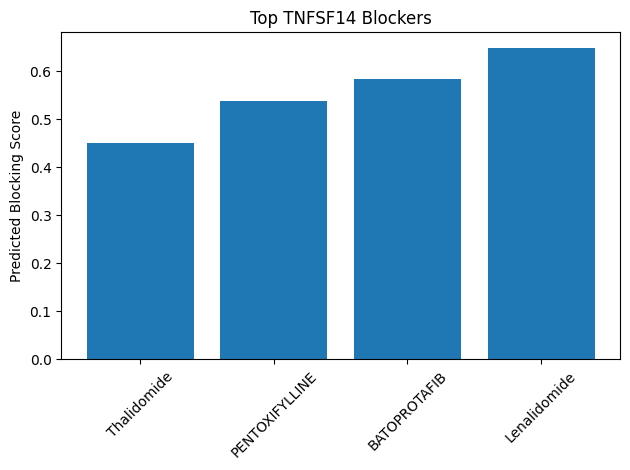

In [17]:
#Plotting the predicted score determined from the random forest.
import matplotlib.pyplot as plt
plt.bar(top_hits["Title"], top_hits["Predicted_Score"])
plt.xticks(rotation=45)
plt.ylabel("Predicted Blocking Score")
plt.title("Top TNFSF14 Blockers")
plt.tight_layout()
plt.show()